In [24]:
# Import necessary libraries
import pandas as pd   
import seaborn as sns      
import matplotlib.pyplot as plt  
import plotly.express as px 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

Prompt: write python code to read csv file named card_transdata.csv and name the new dataframe data_raw
ChatGPT 4

In [25]:
# Read the CSV file into a DataFrame
data_raw = pd.read_csv('card_transdata.csv')

# Display the first few rows of the DataFrame to confirm it loaded correctly
print(data_raw.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                             NaN   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        NaN   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
1              0.0           0.0      0  
2              0.0           1.0      0  
3              0.0           1.0      0  
4              0.0           1.0      0  


Prompt: return the shape and info of the dataframe
ChatGPT 4

In [26]:
data_raw.shape


(999, 8)

In [27]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [28]:
data_raw.describe()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,999.000000,996.000000,997.000000,992.000000,995.000000,997.000000,995.000000,999.000000
mean,26.876607,5.437319,1.655069,0.892137,0.313568,0.117352,0.673367,0.079079
std,63.899697,35.668094,2.351386,0.310364,0.464176,0.322001,0.469218,0.269997
min,0.104184,0.001448,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.990543,0.306441,0.468123,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.340321,0.958539,0.955504,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.393952,3.137259,1.922025,1.000000,1.000000,0.000000,1.000000,0.000000
max,965.910612,990.070315,36.074366,1.000000,1.000000,1.000000,1.000000,1.000000


Prompt: check the dataframe for missing values and drop all of the rows with missing values
ChatGPT 4

In [29]:
# Check for missing values in each column
missing_values = data_raw.isnull().sum()

# Display the missing values
print(missing_values)

distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64


In [30]:
# Drop rows with missing values and store in a new variable
data_cleaned = data_raw.dropna()

data_cleaned.shape


(977, 8)

In [31]:
# Display the first few rows of the cleaned DataFrame
print(data_cleaned.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
3            2.247564                        5.600044   
4           44.190936                        0.566486   
5            5.586408                       13.261073   
6            3.724019                        0.956838   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   
5                        0.064768              1.0        0.0   
6                        0.278465              1.0        0.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
3              0.0           1.0      0  
4              0.0           1.0      0  
5              0.0           0.0      0  
6              0.0           1.0      0  


Prompt: visualize the data with a countplot using seaborn with only 0 and 1 on the x axis
ChatGPT 4

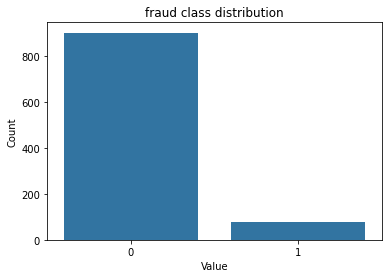

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_cleaned, x='fraud')

# Add labels and title
plt.title('fraud class distribution')
plt.xlabel('Value')
plt.ylabel('Count')

# Display the plot
plt.show()

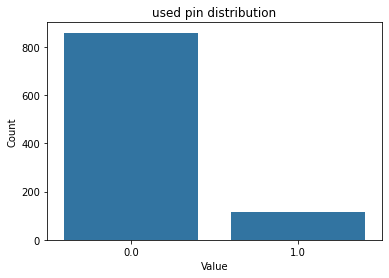

In [33]:

sns.countplot(data=data_cleaned, x='used_pin_number')

# Add labels and title
plt.title('used pin distribution')
plt.xlabel('Value')
plt.ylabel('Count')

# Display the plot
plt.show()

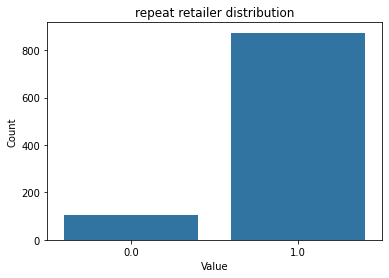

In [34]:
sns.countplot(data=data_cleaned, x='repeat_retailer')

# Add labels and title
plt.title('repeat retailer distribution')
plt.xlabel('Value')
plt.ylabel('Count')

# Display the plot
plt.show()

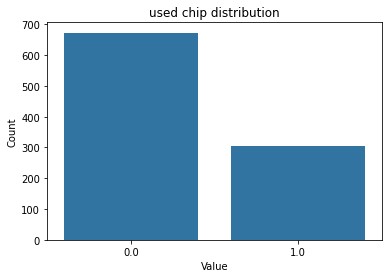

In [35]:
sns.countplot(data=data_cleaned, x='used_chip')

# Add labels and title
plt.title('used chip distribution')
plt.xlabel('Value')
plt.ylabel('Count')

# Display the plot
plt.show()

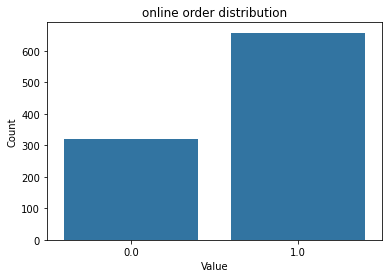

In [36]:
sns.countplot(data=data_cleaned, x='online_order')

# Add labels and title
plt.title('online order distribution')
plt.xlabel('Value')
plt.ylabel('Count')

# Display the plot
plt.show()

Prompt: visualize the distance from last transaction with a histplot in seaborn with 30 bins
ChatGPT 4

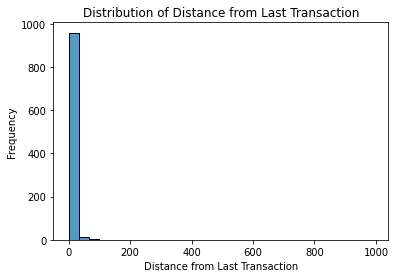

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'distance_from_last_transaction' with the actual column name
sns.histplot(data=data_cleaned, x='distance_from_last_transaction', bins=30)

# Add labels and title
plt.title('Distribution of Distance from Last Transaction')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Frequency')

# Display the plot
plt.show()

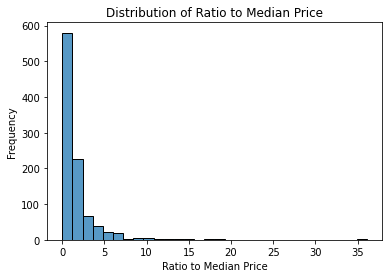

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data_cleaned, x='ratio_to_median_purchase_price', bins=30)

# Add labels and title
plt.title('Distribution of Ratio to Median Price')
plt.xlabel('Ratio to Median Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

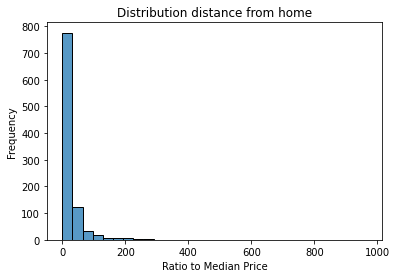

In [39]:
sns.histplot(data=data_cleaned, x='distance_from_home', bins=30)

# Add labels and title
plt.title('Distribution distance from home')
plt.xlabel('Ratio to Median Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Prompt: make a countplot with seaborn of used pin number with the fraud as the hue using green and red for the pallette
ChatGPT 4

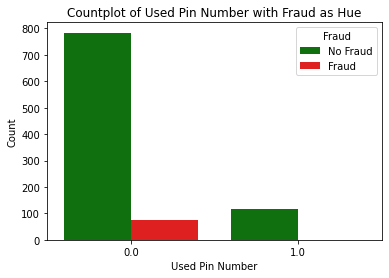

In [40]:
sns.countplot(
    data=data_cleaned, 
    x='used_pin_number', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'}
)

# Add labels and title
plt.title('Countplot of Used Pin Number with Fraud as Hue')
plt.xlabel('Used Pin Number')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Display the plot
plt.show()

Prompt: Make it stacked with percentages
ChatGPT 4

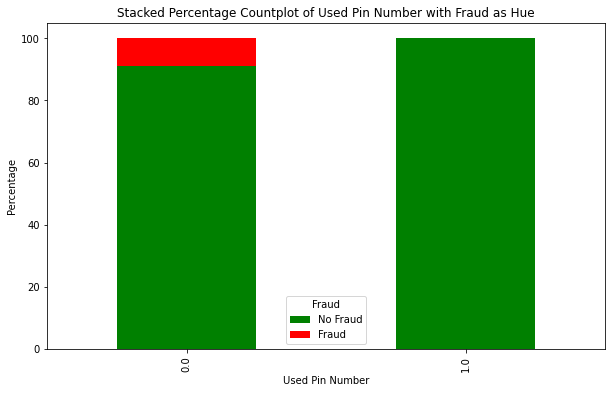

In [41]:
stacked_data = data_cleaned.groupby(['used_pin_number', 'fraud']).size().unstack(fill_value=0)

# Normalize to percentages
stacked_data_percent = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
stacked_data_percent.plot(
    kind='bar', 
    stacked=True, 
    color=['green', 'red'], 
    figsize=(10, 6)
)

# Add labels and title
plt.title('Stacked Percentage Countplot of Used Pin Number with Fraud as Hue')
plt.xlabel('Used Pin Number')
plt.ylabel('Percentage')
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Display the plot
plt.show()

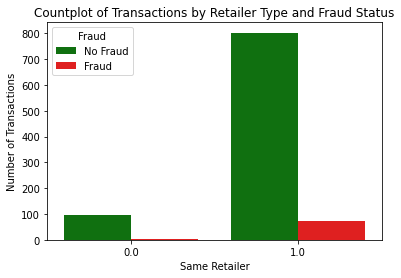

In [42]:
sns.countplot(
    data=data_cleaned, 
    x='repeat_retailer', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'}
)

# Add labels and title
plt.title('Countplot of Transactions by Retailer Type and Fraud Status')
plt.xlabel('Same Retailer')
plt.ylabel('Number of Transactions')
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Display the plot
plt.show()

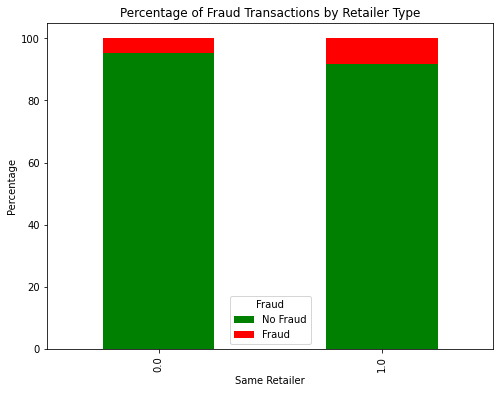

In [43]:
stacked_data = data_cleaned.groupby(['repeat_retailer', 'fraud']).size().unstack(fill_value=0)

# Normalize to percentages
stacked_data_percent = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
stacked_data_percent.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(8, 6)
)

# Add labels and title
plt.title('Percentage of Fraud Transactions by Retailer Type')
plt.xlabel('Same Retailer')
plt.ylabel('Percentage')
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Display the plot
plt.show()

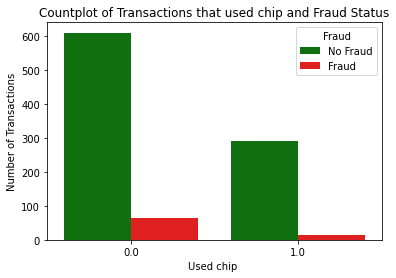

In [44]:
sns.countplot(
    data=data_cleaned, 
    x='used_chip', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'}
)

# Add labels and title
plt.title('Countplot of Transactions that used chip and Fraud Status')
plt.xlabel('Used chip ')
plt.ylabel('Number of Transactions')
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Display the plot
plt.show()

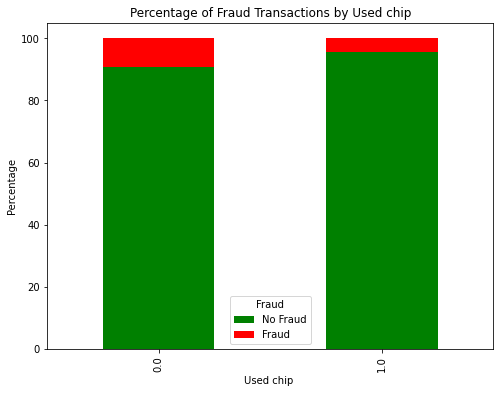

In [45]:
stacked_data = data_cleaned.groupby(['used_chip', 'fraud']).size().unstack(fill_value=0)

# Normalize to percentages
stacked_data_percent = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
stacked_data_percent.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(8, 6)
)

# Add labels and title
plt.title('Percentage of Fraud Transactions by Used chip')
plt.xlabel('Used chip ')
plt.ylabel('Percentage')
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Display the plot
plt.show()

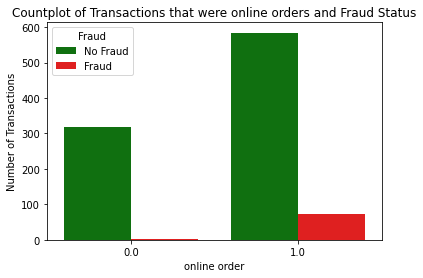

In [46]:
sns.countplot(
    data=data_cleaned, 
    x='online_order', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'}
)

# Add labels and title
plt.title('Countplot of Transactions that were online orders and Fraud Status')
plt.xlabel('online order')
plt.ylabel('Number of Transactions')
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Display the plot
plt.show()

Prompt: make a scatterplot with distance from home on the x axis and ratio to median purchase price on the y axis with fraud in red and non fraud in green
ChatGPT 4

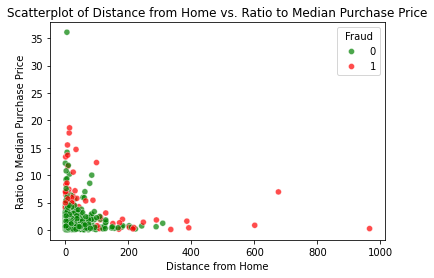

In [48]:
sns.scatterplot(
    data=data_cleaned, 
    x='distance_from_home', 
    y='ratio_to_median_purchase_price', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'},
    alpha=0.7
)

# Add labels and title
plt.title('Scatterplot of Distance from Home vs. Ratio to Median Purchase Price')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio to Median Purchase Price')
plt.legend(title='Fraud')

# Display the plot
plt.show()

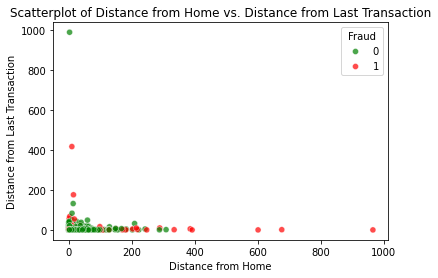

In [50]:
sns.scatterplot(
    data=data_cleaned, 
    x='distance_from_home', 
    y='distance_from_last_transaction', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'},
    alpha=0.7
)

# Add labels and title
plt.title('Scatterplot of Distance from Home vs. Distance from Last Transaction')
plt.xlabel('Distance from Home')
plt.ylabel('Distance from Last Transaction')
plt.legend(title='Fraud')

# Display the plot
plt.show()

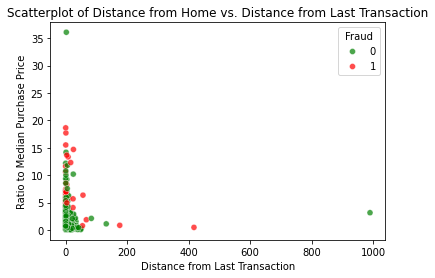

In [51]:
sns.scatterplot(
    data=data_cleaned, 
    x='distance_from_last_transaction', 
    y='ratio_to_median_purchase_price', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'},
    alpha=0.7
)

# Add labels and title
plt.title('Scatterplot of Distance from Home vs. Distance from Last Transaction')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Ratio to Median Purchase Price')
plt.legend(title='Fraud')

# Display the plot
plt.show()

Prompt:split the data into training and testing sets
ChatGPT 4

In [52]:
X = data_cleaned.drop(columns=['fraud'])  # Features
y = data_cleaned['fraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Prompt: make a model that predicts that it is never fraud
ChatGPT 4

In [54]:
import numpy as np

y_pred_never_fraud = np.zeros_like(y_test)
y_pred_never_fraud 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Prompt: train a knn classifier model with 3 as k
ChatGPT 4

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Prompt: make a confusion matrix for the never fraud model and make it red
ChatGPT 4

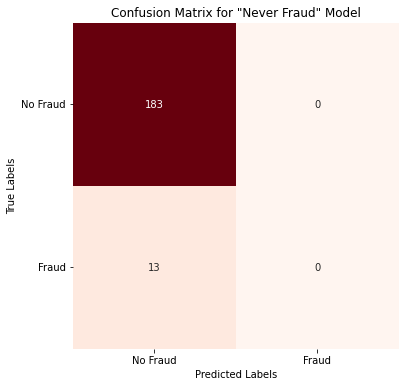

In [57]:
cm = confusion_matrix(y_test, y_pred_never_fraud)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False, square=True)

# Add labels and title
plt.title('Confusion Matrix for "Never Fraud" Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['No Fraud', 'Fraud'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Fraud', 'Fraud'], rotation=0)

# Display the plot
plt.show()

Prompt: make a confusion matrix for the knn and make it blue
ChatGPT 4

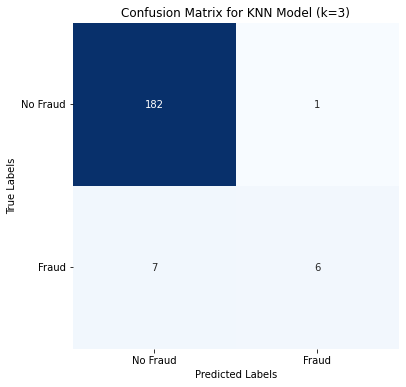

In [58]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)

# Add labels and title
plt.title('Confusion Matrix for KNN Model (k=3)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['No Fraud', 'Fraud'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Fraud', 'Fraud'], rotation=0)

# Display the plot
plt.show()

Prompt: compare the models performance
ChatGPT 4

In [59]:
accuracy_never_fraud = accuracy_score(y_test, y_pred_never_fraud)
precision_never_fraud = precision_score(y_test, y_pred_never_fraud, zero_division=0)
recall_never_fraud = recall_score(y_test, y_pred_never_fraud, zero_division=0)
f1_never_fraud = f1_score(y_test, y_pred_never_fraud, zero_division=0)

# Metrics for the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Display the results
print("Model Performance Comparison:")
print("=====================================")
print(f"{'Metric':<15} {'Never Fraud':<15} {'KNN (k=3)':<15}")
print(f"{'Accuracy':<15} {accuracy_never_fraud:.2f}           {accuracy_knn:.2f}")
print(f"{'Precision':<15} {precision_never_fraud:.2f}           {precision_knn:.2f}")
print(f"{'Recall':<15} {recall_never_fraud:.2f}           {recall_knn:.2f}")
print(f"{'F1 Score':<15} {f1_never_fraud:.2f}           {f1_knn:.2f}")

Model Performance Comparison:
Metric          Never Fraud     KNN (k=3)      
Accuracy        0.93           0.96
Precision       0.00           0.86
Recall          0.00           0.46
F1 Score        0.00           0.60


Prompt: make a barchart with the data
ChatGPT 4

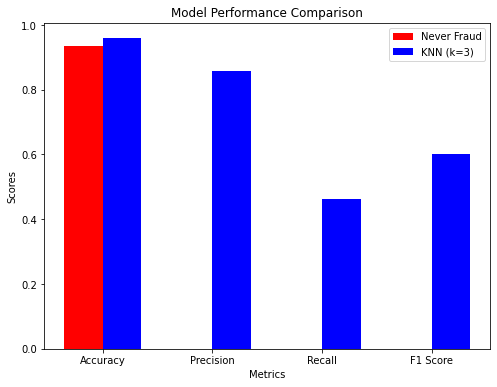

In [60]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
never_fraud_scores = [accuracy_never_fraud, precision_never_fraud, recall_never_fraud, f1_never_fraud]
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]

# Set the bar width
bar_width = 0.35

# Set positions for the bars on the x-axis
index = np.arange(len(metrics))

# Plot the bars
plt.figure(figsize=(8, 6))
plt.bar(index, never_fraud_scores, bar_width, label='Never Fraud', color='red')
plt.bar(index + bar_width, knn_scores, bar_width, label='KNN (k=3)', color='blue')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

# Display the plot
plt.show()